# Notebook für Abstände #

In [2]:
# Initialisierung
import numpy as np
import sympy as sym
import scipy.linalg as sp

# eigene Funktionen
def eliminate(Aa_in, tolerance=np.finfo(float).eps*10., fix=False, verbos=0):
    # eliminates first row
    # assumes Aa is np.array, As.shape>(1,1)
    Aa = Aa_in
    Nn = len(Aa)
    # Mm = len(Aa[0,:])
    if (Nn < 2):
        return Aa
    else:
        if not fix:
            prof = np.argsort(np.abs(Aa_in[:, 0]))
            Aa = Aa[prof[::-1]]
        if np.abs(Aa[0, 0]) > tolerance:
            el = np.eye(Nn)
            el[0:Nn, 0] = -Aa[:, 0] / Aa[0, 0]
            el[0, 0] = 1.0 / Aa[0, 0]
            if (verbos > 50):
                print('Aa \n', Aa)
                print('el \n', el)
                print('pr \n', np.matmul(el, Aa))
            return np.matmul(el, Aa)
        else:
            return Aa


def FirstNonZero(lis):
    return next((i for i, x in enumerate(lis) if x), len(lis)-1)


def SortRows(Aa):
    inx = np.array(list(map(FirstNonZero, Aa)))
    #print('inx: ',inx,inx.argsort())
    return Aa[inx.argsort()]


def mrref(Aa_in, verbos=0):
    Aa = Aa_in*1.0
    Nn = len(Aa)
    kklist = np.arange(0, Nn - 1)
    #print('kklist', kklist)
    for kk in kklist:
        Aa[kk:, kk:] = eliminate(Aa[kk:, kk:], verbos=verbos-1)
    Aa = SortRows(Aa)
    Aa = np.flipud(Aa)
    # for kk in kklist:
    for kkh in kklist:
        kk = FirstNonZero(Aa[kkh, :])
        Aa[kkh::, kk::] = eliminate(Aa[kkh::, kk::], fix=True, verbos=verbos-1)
    return np.flipud(Aa)


def mnull(Aa_in,leps=np.finfo(float).eps*10,verbos=0):
    Aa=mrref(Aa_in) 
    Aa=Aa[list(map(np.linalg.norm,Aa  ))>leps] # extract non-zero linies
    mpiv=np.array(Aa[0]*0,dtype=bool)
    jj=0 # setup mask, indicating pivot-variables
    for ro in Aa>leps:
        for x in ro[jj:]:
            if x:
                mpiv[jj]=True
                jj=jj+1
                break
    
    jj=0 ; la=Aa[:,mpiv] ; veo=[]
    for jj in  np.argwhere(mpiv==False): 
        ve=np.linalg.lstsq(la, -Aa[:,jj],rcond=None)[0]
        vel=np.zeros((len(mpiv)))
        vel[mpiv]=ve[:,0] ; vel[jj]=1
        veo.append(vel)
 
    opt=np.array(veo).T
    if (verbos>10):
        print(Aa.shape,opt.shape)
        print('Test: ',np.matmul(Aa,opt))
    return opt

def SpiegProj(A,Pp,vv,verbos=0):
    # in:
    #  A Punkt zu spieglen
    #  P Aufpunkt der Geraden
    #  vv Richtungsvektor der Geraden
    kk=A-Pp
    nn=[[0,-1],[1,0]] @ vv
    hh=( kk@nn)/(nn@nn)*nn
    if verbos>0:
        print('hh',hh)
    As=A-hh
    Ass=A-2*hh
    if verbos>0:
        print('A\'',As,'A\'\'',Ass)
    return [As,Ass]

## Spiegelung [#109810]

Projekzieren Sie das das Dreieck A, B, C auf die Gerade g. Spiegeln Sie dann das Dreieck an g. 

$\vec{A} = (0,0), \; \vec{B} = (3,-1),\; \vec{C} = (2,6)$ und g: $\vec{x} = $(7, -2) + k*(2,2).

In [4]:
# Die Kordinaten in einzelne Arrays schreiben
A = np.array([0.0, 0.0])
B = np.array([3.0, -1.0])
C = np.array([2.0, 6.0])

# Den Aufpunkt und den Verbindungsvektor in Array schreiben
Pp = np.array([7.0, -2.0])
vv = np.array([2.0, 2.0])


print(SpiegProj(A,Pp,vv))
print(SpiegProj(B,Pp,vv))
print(SpiegProj(C,Pp,vv))
# Der Wert vom ersten Array ist die Projektion vom Punkt auf die Gerade
# Das Zwewite Array zeigt jeweils den gespiegelten Punkt

[array([ 4.5, -4.5]), array([ 9., -9.])]
[array([ 5.5, -3.5]), array([ 8., -6.])]
[array([ 8.5, -0.5]), array([15., -7.])]


# Abstand Punkt-Gerade [#CJ1IXZ]
# Methode mit 3-D Vektoren 
Wir betrachten die Gerade X = A + λ·v und den Punkt B. Wie gross ist ihr Abstand? Berechnen Sie dazu zuerst die Fläche aufgespannt durch r = B - A und v.

In [11]:
#Array erstellen für Aufpunkt (A) Verbindungsvektor(vv) und gegebener Punkt (B)
A = np.array([-4.0, 0.0, 5.0])
vv = np.array([8.0, 0.0, 15.0])
B = np.array([-4.0, 1.0, 3.0])

# Verbindungsvektor erstellen für Punkt(B) - Aufpunkt(A)
ab = B - A


print('Kreuzprodukt',np.cross(ab,vv))
print('Fläche',np.linalg.norm(np.cross(ab, vv)))
print('Abstand',np.linalg.norm(np.cross(ab, vv))/np.linalg.norm(vv))

Kreuzprodukt [ 15. -16.  -8.]
Fläche 23.345235059857504
Abstand 1.3732491211680884


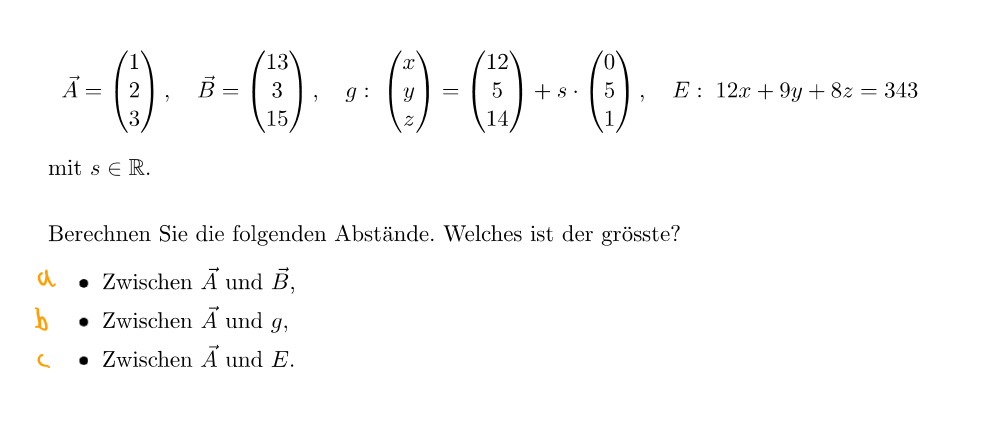

In [9]:
A = np.array([1,2,3])

Pp = np.array([12,5,14])
vv = np.array([0,5,1])

App = A - Pp
print(App)

print('Kreuzprodukt',np.cross(App, vv))
print('Fläche',np.linalg.norm(np.cross(App, vv)))
print('Abstand',np.linalg.norm(np.cross(App, vv))/np.linalg.norm(vv))


[-11  -3 -11]
Kreuzprodukt [ 52  11 -55]
Fläche 76.48529270389177
Abstand 15.000000000000002
